In [1]:
import torch
from time import gmtime, strftime

from attention_dynamic_model import AttentionDynamicModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from utils import create_data_on_disk, get_cur_time

In [2]:
# Params of model
SAMPLES = 1280000 # 1024*1250
BATCH = 1024
START_EPOCH = 0
END_EPOCH = 40
FROM_CHECKPOINT = False
embedding_dim = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 625
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 20
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

# Initialize model
model_pt = AttentionDynamicModel(embedding_dim).cuda()
set_decode_type(model_pt, "sampling")
print(get_cur_time(), 'model initialized')

# Create and save validation dataset
validation_dataset = create_data_on_disk(GRAPH_SIZE,
                                         VALIDATE_SET_SIZE,
                                         is_save=True,
                                         filename=FILENAME,
                                         is_return=True,
                                         seed = SEED)
print(get_cur_time(), 'validation dataset created and saved on the disk')

# Initialize optimizer
optimizer = torch.optim.Adam(params=model_pt.parameters(), lr=LEARNING_RATE)

2021-08-31 00:16:29 model initialized
2021-08-31 00:16:29 validation dataset created and saved on the disk


In [3]:
# Initialize baseline
baseline = RolloutBaseline(model_pt,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = 0,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE
                           )
print(get_cur_time(), 'baseline initialized')

Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.90it/s]

Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.12it/s]

2021-08-31 00:16:31 baseline initialized


batch calculation at epoch 0: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 0: 1it [00:01,  1.16s/it]

grad_global_norm = 6.027115345001221, clipped_norm = 0.9999998211860657
Epoch 0 (batch = 0): Loss: -1.0668154954910278: Cost: 13.029962539672852


batch calculation at epoch 0: 626it [07:12,  1.48it/s]

grad_global_norm = 2.394676923751831, clipped_norm = 0.9999995827674866
Epoch 0 (batch = 625): Loss: 0.41713735461235046: Cost: 8.813619613647461


batch calculation at epoch 0: 1250it [15:00,  1.39it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.25it/s]

Evaluating candidate model on baseline dataset (callback epoch = 0)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 candidate mean 7.130025863647461, baseline epoch 0 mean 10.678730010986328, difference -3.548704147338867
p-value: 0.0
Update baseline
Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  6.79it/s]

alpha was updated to 1.0


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.27it/s]


Validation score: 7.142499923706055
2021-08-31 00:31:36 Epoch 0: Loss: 0.05772543326020241: Cost: 8.126152038574219


Rollout greedy execution: 100%|██████████| 625/625 [02:03<00:00,  5.06it/s]
batch calculation at epoch 1: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 1: 1it [00:00,  1.42it/s]

grad_global_norm = 2.3114888668060303, clipped_norm = 0.9999996423721313
Epoch 1 (batch = 0): Loss: -1.0338002443313599: Cost: 7.215219974517822


batch calculation at epoch 1: 626it [08:26,  1.29it/s]

grad_global_norm = 1.5616954565048218, clipped_norm = 0.9999993443489075
Epoch 1 (batch = 625): Loss: -0.04109835997223854: Cost: 7.0990190505981445


batch calculation at epoch 1: 1250it [16:48,  1.24it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.18it/s]

Evaluating candidate model on baseline dataset (callback epoch = 1)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.03it/s]

Epoch 1 candidate mean 6.824679851531982, baseline epoch 1 mean 7.127614974975586, difference -0.3029351234436035
p-value: 0.0
Update baseline
Evaluating baseline model on baseline dataset (epoch = 1)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]


Validation score: 6.833199977874756
2021-08-31 00:50:33 Epoch 1: Loss: 0.43523985147476196: Cost: 7.0198774337768555


Rollout greedy execution: 100%|██████████| 625/625 [02:10<00:00,  4.80it/s]
batch calculation at epoch 2: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 2: 1it [00:00,  1.30it/s]

grad_global_norm = 2.4715218544006348, clipped_norm = 0.9999996423721313
Epoch 2 (batch = 0): Loss: -0.6143490672111511: Cost: 6.918206214904785


batch calculation at epoch 2: 626it [08:20,  1.31it/s]

grad_global_norm = 2.28598690032959, clipped_norm = 0.9999995827674866
Epoch 2 (batch = 625): Loss: -0.2358335554599762: Cost: 6.835482597351074


batch calculation at epoch 2: 1250it [16:25,  1.27it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.30it/s]

Evaluating candidate model on baseline dataset (callback epoch = 2)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2 candidate mean 6.712669372558594, baseline epoch 2 mean 6.847395420074463, difference -0.13472604751586914
p-value: 3.860358203974445e-255
Update baseline
Evaluating baseline model on baseline dataset (epoch = 2)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.65it/s]


Validation score: 6.69290018081665
2021-08-31 01:09:13 Epoch 2: Loss: -0.05244047939777374: Cost: 6.799927234649658


Rollout greedy execution: 100%|██████████| 625/625 [02:12<00:00,  4.71it/s]
batch calculation at epoch 3: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 3: 1it [00:00,  1.21it/s]

grad_global_norm = 2.1257359981536865, clipped_norm = 0.9999995827674866
Epoch 3 (batch = 0): Loss: -0.3617994785308838: Cost: 6.717039585113525


batch calculation at epoch 3: 626it [08:08,  1.36it/s]

grad_global_norm = 1.9289133548736572, clipped_norm = 0.9999995231628418
Epoch 3 (batch = 625): Loss: -0.28829658031463623: Cost: 6.721423625946045


batch calculation at epoch 3: 1250it [16:07,  1.29it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.55it/s]

Evaluating candidate model on baseline dataset (callback epoch = 3)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.14it/s]

Epoch 3 candidate mean 6.625886917114258, baseline epoch 3 mean 6.673469543457031, difference -0.04758262634277344
p-value: 4.1064769689789866e-45
Update baseline
Evaluating baseline model on baseline dataset (epoch = 3)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.92it/s]


Validation score: 6.648099899291992
2021-08-31 01:27:38 Epoch 3: Loss: -0.21513542532920837: Cost: 6.705970287322998


Rollout greedy execution: 100%|██████████| 625/625 [02:09<00:00,  4.81it/s]
batch calculation at epoch 4: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 4: 1it [00:00,  1.42it/s]

grad_global_norm = 2.002413272857666, clipped_norm = 0.999999463558197
Epoch 4 (batch = 0): Loss: -0.3305237591266632: Cost: 6.700907230377197


batch calculation at epoch 4: 626it [08:03,  1.35it/s]

grad_global_norm = 1.8158410787582397, clipped_norm = 0.999999463558197
Epoch 4 (batch = 625): Loss: -0.22202523052692413: Cost: 6.660002708435059


batch calculation at epoch 4: 1250it [16:04,  1.30it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.90it/s]

Evaluating candidate model on baseline dataset (callback epoch = 4)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4 candidate mean 6.586111068725586, baseline epoch 4 mean 6.64369535446167, difference -0.057584285736083984
p-value: 2.4792885020810764e-73
Update baseline
Evaluating baseline model on baseline dataset (epoch = 4)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.64it/s]


Validation score: 6.585599899291992
2021-08-31 01:45:57 Epoch 4: Loss: -0.16910643875598907: Cost: 6.647656440734863


Rollout greedy execution: 100%|██████████| 625/625 [01:57<00:00,  5.31it/s]
batch calculation at epoch 5: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 5: 1it [00:00,  1.35it/s]

grad_global_norm = 2.4170424938201904, clipped_norm = 0.9999997019767761
Epoch 5 (batch = 0): Loss: -0.25215989351272583: Cost: 6.585050582885742


batch calculation at epoch 5: 626it [08:17,  1.37it/s]

grad_global_norm = 2.3629395961761475, clipped_norm = 0.9999995231628418
Epoch 5 (batch = 625): Loss: -0.24504508078098297: Cost: 6.614116668701172


batch calculation at epoch 5: 1250it [16:16,  1.28it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.46it/s]

Evaluating candidate model on baseline dataset (callback epoch = 5)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.42it/s]

Epoch 5 candidate mean 6.56804084777832, baseline epoch 5 mean 6.596716403961182, difference -0.028675556182861328
p-value: 2.953747600076083e-24
Update baseline
Evaluating baseline model on baseline dataset (epoch = 5)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]


Validation score: 6.557700157165527
2021-08-31 02:04:16 Epoch 5: Loss: -0.21084755659103394: Cost: 6.606468200683594


Rollout greedy execution: 100%|██████████| 625/625 [01:53<00:00,  5.48it/s]
batch calculation at epoch 6: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 6: 1it [00:00,  1.44it/s]

grad_global_norm = 1.9304836988449097, clipped_norm = 0.9999995231628418
Epoch 6 (batch = 0): Loss: -0.20161205530166626: Cost: 6.552918910980225


batch calculation at epoch 6: 626it [08:13,  1.35it/s]

grad_global_norm = 2.2945096492767334, clipped_norm = 0.9999995827674866
Epoch 6 (batch = 625): Loss: -0.23037846386432648: Cost: 6.586703300476074


batch calculation at epoch 6: 1250it [16:09,  1.29it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.09it/s]

Evaluating candidate model on baseline dataset (callback epoch = 6)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.46it/s]

Epoch 6 candidate mean 6.533603668212891, baseline epoch 6 mean 6.558847427368164, difference -0.025243759155273438
p-value: 8.209737291949247e-21
Update baseline
Evaluating baseline model on baseline dataset (epoch = 6)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]


Validation score: 6.533400058746338
2021-08-31 02:22:24 Epoch 6: Loss: -0.20123356580734253: Cost: 6.579024314880371


Rollout greedy execution: 100%|██████████| 625/625 [01:55<00:00,  5.42it/s]
batch calculation at epoch 7: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 7: 1it [00:00,  1.28it/s]

grad_global_norm = 1.7838009595870972, clipped_norm = 0.9999994039535522
Epoch 7 (batch = 0): Loss: -0.2341514229774475: Cost: 6.604394435882568


batch calculation at epoch 7: 626it [07:54,  1.39it/s]

grad_global_norm = 2.0799198150634766, clipped_norm = 0.999999463558197
Epoch 7 (batch = 625): Loss: -0.22457249462604523: Cost: 6.564850330352783


batch calculation at epoch 7: 1250it [16:01,  1.30it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.50it/s]

Evaluating candidate model on baseline dataset (callback epoch = 7)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 7 candidate mean 6.510906219482422, baseline epoch 7 mean 6.523597717285156, difference -0.012691497802734375
p-value: 2.586950588666648e-07
Update baseline
Evaluating baseline model on baseline dataset (epoch = 7)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.05it/s]


Validation score: 6.523499965667725
2021-08-31 02:40:26 Epoch 7: Loss: -0.20451880991458893: Cost: 6.559495449066162


Rollout greedy execution: 100%|██████████| 625/625 [01:56<00:00,  5.35it/s]
batch calculation at epoch 8: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 8: 1it [00:00,  1.24it/s]

grad_global_norm = 2.0416557788848877, clipped_norm = 0.9999995827674866
Epoch 8 (batch = 0): Loss: -0.18443427979946136: Cost: 6.581435203552246


batch calculation at epoch 8: 626it [07:53,  1.40it/s]

grad_global_norm = 2.371631145477295, clipped_norm = 0.9999995827674866
Epoch 8 (batch = 625): Loss: -0.18671269714832306: Cost: 6.544984340667725


batch calculation at epoch 8: 1250it [15:55,  1.31it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.20it/s]

Evaluating candidate model on baseline dataset (callback epoch = 8)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.06it/s]

Epoch 8 candidate mean 6.509038925170898, baseline epoch 8 mean 6.524211883544922, difference -0.015172958374023438
p-value: 2.28342310032771e-10
Update baseline
Evaluating baseline model on baseline dataset (epoch = 8)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.11it/s]


Validation score: 6.505799770355225
2021-08-31 02:58:23 Epoch 8: Loss: -0.17670832574367523: Cost: 6.542794704437256


Rollout greedy execution: 100%|██████████| 625/625 [01:54<00:00,  5.46it/s]
batch calculation at epoch 9: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 9: 1it [00:00,  1.27it/s]

grad_global_norm = 2.7055022716522217, clipped_norm = 0.9999997019767761
Epoch 9 (batch = 0): Loss: -0.17154733836650848: Cost: 6.497735023498535


batch calculation at epoch 9: 626it [07:51,  1.36it/s]

grad_global_norm = 3.116502523422241, clipped_norm = 0.9999996423721313
Epoch 9 (batch = 625): Loss: -0.19612887501716614: Cost: 6.535821437835693


batch calculation at epoch 9: 1250it [15:37,  1.33it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.14it/s]

Evaluating candidate model on baseline dataset (callback epoch = 9)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.13it/s]

Epoch 9 candidate mean 6.497844219207764, baseline epoch 9 mean 6.519439220428467, difference -0.021595001220703125
p-value: 4.9528113142628694e-21
Update baseline
Evaluating baseline model on baseline dataset (epoch = 9)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.38it/s]


Validation score: 6.487299919128418
2021-08-31 03:15:59 Epoch 9: Loss: -0.17904146015644073: Cost: 6.530584812164307


Rollout greedy execution: 100%|██████████| 625/625 [02:07<00:00,  4.90it/s]
batch calculation at epoch 10: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 10: 1it [00:00,  1.39it/s]

grad_global_norm = 2.239109754562378, clipped_norm = 0.9999995827674866
Epoch 10 (batch = 0): Loss: -0.15314054489135742: Cost: 6.525386333465576


batch calculation at epoch 10: 626it [07:48,  1.34it/s]

grad_global_norm = 2.263974905014038, clipped_norm = 0.9999995827674866
Epoch 10 (batch = 625): Loss: -0.20949597656726837: Cost: 6.5220627784729


batch calculation at epoch 10: 1250it [15:32,  1.34it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  6.53it/s]

Evaluating candidate model on baseline dataset (callback epoch = 10)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.35it/s]

Epoch 10 candidate mean 6.51194429397583, baseline epoch 10 mean 6.507481098175049, difference 0.00446319580078125


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.42it/s]


Validation score: 6.49399995803833
2021-08-31 03:33:43 Epoch 10: Loss: -0.19809743762016296: Cost: 6.519343852996826


Rollout greedy execution: 100%|██████████| 625/625 [02:07<00:00,  4.92it/s]
batch calculation at epoch 11: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 11: 1it [00:00,  1.43it/s]

grad_global_norm = 2.3465282917022705, clipped_norm = 0.9999995827674866
Epoch 11 (batch = 0): Loss: -0.1591038703918457: Cost: 6.518631458282471


batch calculation at epoch 11: 626it [07:44,  1.44it/s]

grad_global_norm = 1.9023748636245728, clipped_norm = 0.999999463558197
Epoch 11 (batch = 625): Loss: -0.16161136329174042: Cost: 6.510589122772217


batch calculation at epoch 11: 1250it [15:26,  1.35it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.90it/s]

Evaluating candidate model on baseline dataset (callback epoch = 11)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.12it/s]

Epoch 11 candidate mean 6.494513034820557, baseline epoch 11 mean 6.507481098175049, difference -0.012968063354492188
p-value: 5.367208512256011e-08
Update baseline
Evaluating baseline model on baseline dataset (epoch = 11)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.70it/s]


Validation score: 6.478499889373779
2021-08-31 03:51:21 Epoch 11: Loss: -0.15416735410690308: Cost: 6.508296012878418


Rollout greedy execution: 100%|██████████| 625/625 [01:53<00:00,  5.49it/s]
batch calculation at epoch 12: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 12: 1it [00:00,  1.45it/s]

grad_global_norm = 2.3118860721588135, clipped_norm = 0.9999995827674866
Epoch 12 (batch = 0): Loss: -0.13856112957000732: Cost: 6.503539085388184


batch calculation at epoch 12: 626it [08:00,  1.41it/s]

grad_global_norm = 3.272122383117676, clipped_norm = 0.9999997019767761
Epoch 12 (batch = 625): Loss: -0.16633811593055725: Cost: 6.499916076660156


batch calculation at epoch 12: 1250it [15:44,  1.32it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.80it/s]

Evaluating candidate model on baseline dataset (callback epoch = 12)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.21it/s]

Epoch 12 candidate mean 6.4845685958862305, baseline epoch 12 mean 6.4756622314453125, difference 0.008906364440917969


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.25it/s]


Validation score: 6.486999988555908
2021-08-31 04:09:02 Epoch 12: Loss: -0.16621172428131104: Cost: 6.49953556060791


Rollout greedy execution: 100%|██████████| 625/625 [01:52<00:00,  5.57it/s]
batch calculation at epoch 13: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 13: 1it [00:00,  1.35it/s]

grad_global_norm = 2.5574100017547607, clipped_norm = 0.9999996423721313
Epoch 13 (batch = 0): Loss: -0.2664288878440857: Cost: 6.501054763793945


batch calculation at epoch 13: 626it [07:43,  1.37it/s]

grad_global_norm = 2.2577412128448486, clipped_norm = 0.9999995231628418
Epoch 13 (batch = 625): Loss: -0.14383673667907715: Cost: 6.496207237243652


batch calculation at epoch 13: 1250it [15:37,  1.33it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.00it/s]

Evaluating candidate model on baseline dataset (callback epoch = 13)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.30it/s]

Epoch 13 candidate mean 6.472360610961914, baseline epoch 13 mean 6.4756622314453125, difference -0.0033016204833984375
p-value: 0.09375605353275249


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.96it/s]


Validation score: 6.476399898529053
2021-08-31 04:26:35 Epoch 13: Loss: -0.13755233585834503: Cost: 6.494082450866699


Rollout greedy execution: 100%|██████████| 625/625 [01:52<00:00,  5.56it/s]
batch calculation at epoch 14: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 14: 1it [00:00,  1.36it/s]

grad_global_norm = 1.8702430725097656, clipped_norm = 0.9999995231628418
Epoch 14 (batch = 0): Loss: -0.18117381632328033: Cost: 6.47097110748291


batch calculation at epoch 14: 626it [07:42,  1.40it/s]

grad_global_norm = 2.8650879859924316, clipped_norm = 0.9999996423721313
Epoch 14 (batch = 625): Loss: -0.12349574267864227: Cost: 6.489189624786377


batch calculation at epoch 14: 1250it [15:22,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.92it/s]

Evaluating candidate model on baseline dataset (callback epoch = 14)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.92it/s]

Epoch 14 candidate mean 6.4587626457214355, baseline epoch 14 mean 6.4756622314453125, difference -0.016899585723876953
p-value: 2.1023129801757364e-12
Update baseline
Evaluating baseline model on baseline dataset (epoch = 14)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.61it/s]


Validation score: 6.460599899291992
2021-08-31 04:43:55 Epoch 14: Loss: -0.11532382667064667: Cost: 6.487607479095459


Rollout greedy execution: 100%|██████████| 625/625 [02:05<00:00,  5.00it/s]
batch calculation at epoch 15: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 15: 1it [00:00,  1.41it/s]

grad_global_norm = 1.5229368209838867, clipped_norm = 0.9999992847442627
Epoch 15 (batch = 0): Loss: -0.08166652917861938: Cost: 6.488171577453613


batch calculation at epoch 15: 626it [07:37,  1.37it/s]

grad_global_norm = 1.9161174297332764, clipped_norm = 0.9999995231628418
Epoch 15 (batch = 625): Loss: -0.1460743546485901: Cost: 6.482095241546631


batch calculation at epoch 15: 1250it [15:16,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  6.58it/s]

Evaluating candidate model on baseline dataset (callback epoch = 15)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.41it/s]

Epoch 15 candidate mean 6.459384918212891, baseline epoch 15 mean 6.46403694152832, difference -0.0046520233154296875
p-value: 0.023140809495987763
Update baseline
Evaluating baseline model on baseline dataset (epoch = 15)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.57it/s]


Validation score: 6.458600044250488
2021-08-31 05:01:20 Epoch 15: Loss: -0.14074893295764923: Cost: 6.480199813842773


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.64it/s]
batch calculation at epoch 16: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 16: 1it [00:00,  1.32it/s]

grad_global_norm = 2.939380168914795, clipped_norm = 0.9999997019767761
Epoch 16 (batch = 0): Loss: -0.10295625030994415: Cost: 6.4456586837768555


batch calculation at epoch 16: 626it [07:51,  1.39it/s]

grad_global_norm = 2.353914737701416, clipped_norm = 0.9999996423721313
Epoch 16 (batch = 625): Loss: -0.13890086114406586: Cost: 6.476585388183594


batch calculation at epoch 16: 1250it [15:31,  1.34it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.61it/s]

Evaluating candidate model on baseline dataset (callback epoch = 16)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.18it/s]

Epoch 16 candidate mean 6.446474075317383, baseline epoch 16 mean 6.448409557342529, difference -0.0019354820251464844
p-value: 0.2082425275862821


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.18it/s]


Validation score: 6.457300186157227
2021-08-31 05:18:46 Epoch 16: Loss: -0.1312413513660431: Cost: 6.474483013153076


Rollout greedy execution: 100%|██████████| 625/625 [01:53<00:00,  5.53it/s]
batch calculation at epoch 17: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 17: 1it [00:00,  1.24it/s]

grad_global_norm = 2.3753247261047363, clipped_norm = 0.9999995827674866
Epoch 17 (batch = 0): Loss: -0.1336967498064041: Cost: 6.49203634262085


batch calculation at epoch 17: 626it [07:37,  1.40it/s]

grad_global_norm = 2.703552007675171, clipped_norm = 0.9999996423721313
Epoch 17 (batch = 625): Loss: -0.11924676597118378: Cost: 6.472006797790527


batch calculation at epoch 17: 1250it [15:31,  1.34it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.19it/s]

Evaluating candidate model on baseline dataset (callback epoch = 17)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 17 candidate mean 6.4396209716796875, baseline epoch 17 mean 6.448409557342529, difference -0.008788585662841797
p-value: 8.244845001307312e-05
Update baseline
Evaluating baseline model on baseline dataset (epoch = 17)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.23it/s]


Validation score: 6.446100234985352
2021-08-31 05:36:16 Epoch 17: Loss: -0.11284375190734863: Cost: 6.469790458679199


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.64it/s]
batch calculation at epoch 18: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 18: 1it [00:00,  1.43it/s]

grad_global_norm = 1.9750452041625977, clipped_norm = 0.999999463558197
Epoch 18 (batch = 0): Loss: -0.12269773334264755: Cost: 6.479109764099121


batch calculation at epoch 18: 626it [07:38,  1.44it/s]

grad_global_norm = 2.088261604309082, clipped_norm = 0.9999995827674866
Epoch 18 (batch = 625): Loss: -0.13232126832008362: Cost: 6.466843128204346


batch calculation at epoch 18: 1250it [15:13,  1.37it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.79it/s]

Evaluating candidate model on baseline dataset (callback epoch = 18)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.33it/s]

Epoch 18 candidate mean 6.460752964019775, baseline epoch 18 mean 6.467161178588867, difference -0.006408214569091797
p-value: 0.00325299872111177
Update baseline
Evaluating baseline model on baseline dataset (epoch = 18)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.57it/s]


Validation score: 6.438000202178955
2021-08-31 05:53:24 Epoch 18: Loss: -0.128618985414505: Cost: 6.464822769165039


Rollout greedy execution: 100%|██████████| 625/625 [02:04<00:00,  5.04it/s]
batch calculation at epoch 19: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 19: 1it [00:00,  1.42it/s]

grad_global_norm = 1.9301033020019531, clipped_norm = 0.999999463558197
Epoch 19 (batch = 0): Loss: -0.1141408383846283: Cost: 6.466921329498291


batch calculation at epoch 19: 626it [07:38,  1.47it/s]

grad_global_norm = 2.313491106033325, clipped_norm = 0.9999995827674866
Epoch 19 (batch = 625): Loss: -0.13846318423748016: Cost: 6.460400104522705


batch calculation at epoch 19: 1250it [15:14,  1.37it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.20it/s]

Evaluating candidate model on baseline dataset (callback epoch = 19)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.16it/s]

Epoch 19 candidate mean 6.436435699462891, baseline epoch 19 mean 6.440877914428711, difference -0.0044422149658203125
p-value: 0.018370215595497084
Update baseline
Evaluating baseline model on baseline dataset (epoch = 19)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Validation score: 6.433899879455566
2021-08-31 06:10:48 Epoch 19: Loss: -0.13243529200553894: Cost: 6.459164142608643


Rollout greedy execution: 100%|██████████| 625/625 [01:51<00:00,  5.60it/s]
batch calculation at epoch 20: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 20: 1it [00:00,  1.34it/s]

grad_global_norm = 2.380662202835083, clipped_norm = 0.9999996423721313
Epoch 20 (batch = 0): Loss: -0.11956396698951721: Cost: 6.524051666259766


batch calculation at epoch 20: 626it [07:52,  1.39it/s]

grad_global_norm = 1.9079939126968384, clipped_norm = 0.999999463558197
Epoch 20 (batch = 625): Loss: -0.13873715698719025: Cost: 6.456024646759033


batch calculation at epoch 20: 1250it [15:27,  1.35it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.06it/s]

Evaluating candidate model on baseline dataset (callback epoch = 20)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  9.00it/s]

Epoch 20 candidate mean 6.430592060089111, baseline epoch 20 mean 6.429439067840576, difference 0.0011529922485351562


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.28it/s]


Validation score: 6.438000202178955
2021-08-31 06:28:09 Epoch 20: Loss: -0.13290825486183167: Cost: 6.453587532043457


Rollout greedy execution: 100%|██████████| 625/625 [01:49<00:00,  5.69it/s]
batch calculation at epoch 21: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 21: 1it [00:00,  1.40it/s]

grad_global_norm = 2.296560764312744, clipped_norm = 0.9999995827674866
Epoch 21 (batch = 0): Loss: -0.11638560891151428: Cost: 6.491926193237305


batch calculation at epoch 21: 626it [07:37,  1.49it/s]

grad_global_norm = 2.0692358016967773, clipped_norm = 0.9999995231628418
Epoch 21 (batch = 625): Loss: -0.1260686218738556: Cost: 6.451298713684082


batch calculation at epoch 21: 1250it [15:10,  1.37it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.42it/s]

Evaluating candidate model on baseline dataset (callback epoch = 21)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 21 candidate mean 6.434387683868408, baseline epoch 21 mean 6.429439067840576, difference 0.004948616027832031


Rollout greedy execution: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


Validation score: 6.443600177764893
2021-08-31 06:45:16 Epoch 21: Loss: -0.12190187722444534: Cost: 6.44996976852417


Rollout greedy execution: 100%|██████████| 625/625 [02:02<00:00,  5.11it/s]
batch calculation at epoch 22: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 22: 1it [00:00,  1.55it/s]

grad_global_norm = 1.9411216974258423, clipped_norm = 0.9999995231628418
Epoch 22 (batch = 0): Loss: -0.19911369681358337: Cost: 6.464524269104004


batch calculation at epoch 22: 626it [07:33,  1.41it/s]

grad_global_norm = 2.80659556388855, clipped_norm = 0.9999997019767761
Epoch 22 (batch = 625): Loss: -0.11476957052946091: Cost: 6.4479079246521


batch calculation at epoch 22: 1250it [15:06,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.13it/s]

Evaluating candidate model on baseline dataset (callback epoch = 22)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.49it/s]

Epoch 22 candidate mean 6.419052600860596, baseline epoch 22 mean 6.429439067840576, difference -0.010386466979980469
p-value: 2.4589847648483877e-06
Update baseline
Evaluating baseline model on baseline dataset (epoch = 22)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.02it/s]


Validation score: 6.421000003814697
2021-08-31 07:02:29 Epoch 22: Loss: -0.11239375174045563: Cost: 6.447535991668701


Rollout greedy execution: 100%|██████████| 625/625 [02:06<00:00,  4.95it/s]
batch calculation at epoch 23: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 23: 1it [00:00,  1.44it/s]

grad_global_norm = 2.1981406211853027, clipped_norm = 0.9999995827674866
Epoch 23 (batch = 0): Loss: -0.06402552872896194: Cost: 6.464924335479736


batch calculation at epoch 23: 626it [07:33,  1.44it/s]

grad_global_norm = 2.2856457233428955, clipped_norm = 0.9999995231628418
Epoch 23 (batch = 625): Loss: -0.13125038146972656: Cost: 6.444540977478027


batch calculation at epoch 23: 1250it [15:08,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.94it/s]

Evaluating candidate model on baseline dataset (callback epoch = 23)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.52it/s]

Epoch 23 candidate mean 6.43772029876709, baseline epoch 23 mean 6.427553653717041, difference 0.010166645050048828


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.35it/s]


Validation score: 6.432000160217285
2021-08-31 07:19:47 Epoch 23: Loss: -0.12801744043827057: Cost: 6.443129062652588


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.64it/s]
batch calculation at epoch 24: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 24: 1it [00:00,  1.40it/s]

grad_global_norm = 2.3011114597320557, clipped_norm = 0.9999996423721313
Epoch 24 (batch = 0): Loss: -0.1693931668996811: Cost: 6.461979866027832


batch calculation at epoch 24: 626it [07:35,  1.47it/s]

grad_global_norm = 2.038404703140259, clipped_norm = 0.9999995231628418
Epoch 24 (batch = 625): Loss: -0.12140243500471115: Cost: 6.441113471984863


batch calculation at epoch 24: 1250it [15:21,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.16it/s]

Evaluating candidate model on baseline dataset (callback epoch = 24)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.47it/s]

Epoch 24 candidate mean 6.4296674728393555, baseline epoch 24 mean 6.427553653717041, difference 0.002113819122314453


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.90it/s]


Validation score: 6.427800178527832
2021-08-31 07:37:02 Epoch 24: Loss: -0.11823546141386032: Cost: 6.440165996551514


Rollout greedy execution: 100%|██████████| 625/625 [01:53<00:00,  5.48it/s]
batch calculation at epoch 25: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 25: 1it [00:00,  1.45it/s]

grad_global_norm = 2.0857040882110596, clipped_norm = 0.999999463558197
Epoch 25 (batch = 0): Loss: -0.1358443796634674: Cost: 6.412321090698242


batch calculation at epoch 25: 626it [07:35,  1.43it/s]

grad_global_norm = 2.331122875213623, clipped_norm = 0.9999995231628418
Epoch 25 (batch = 625): Loss: -0.11102128028869629: Cost: 6.437289714813232


batch calculation at epoch 25: 1250it [15:08,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.47it/s]

Evaluating candidate model on baseline dataset (callback epoch = 25)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.56it/s]

Epoch 25 candidate mean 6.427104473114014, baseline epoch 25 mean 6.427553653717041, difference -0.00044918060302734375
p-value: 0.4197641887754707


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.14it/s]


Validation score: 6.418399810791016
2021-08-31 07:54:07 Epoch 25: Loss: -0.10792962461709976: Cost: 6.436948776245117


Rollout greedy execution: 100%|██████████| 625/625 [02:05<00:00,  5.00it/s]
batch calculation at epoch 26: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 26: 1it [00:00,  1.46it/s]

grad_global_norm = 2.5164759159088135, clipped_norm = 0.9999995827674866
Epoch 26 (batch = 0): Loss: -0.1606641411781311: Cost: 6.435614109039307


batch calculation at epoch 26: 626it [07:33,  1.43it/s]

grad_global_norm = 1.8455162048339844, clipped_norm = 0.9999995231628418
Epoch 26 (batch = 625): Loss: -0.09915708005428314: Cost: 6.43414306640625


batch calculation at epoch 26: 1250it [15:05,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.27it/s]

Evaluating candidate model on baseline dataset (callback epoch = 26)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.66it/s]

Epoch 26 candidate mean 6.43090295791626, baseline epoch 26 mean 6.427553653717041, difference 0.00334930419921875


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]


Validation score: 6.4274001121521
2021-08-31 08:11:20 Epoch 26: Loss: -0.09892246127128601: Cost: 6.433500289916992


Rollout greedy execution: 100%|██████████| 625/625 [01:51<00:00,  5.60it/s]
batch calculation at epoch 27: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 27: 1it [00:00,  1.45it/s]

grad_global_norm = 2.4960951805114746, clipped_norm = 0.9999995827674866
Epoch 27 (batch = 0): Loss: -0.12203453481197357: Cost: 6.44228458404541


batch calculation at epoch 27: 626it [07:47,  1.50it/s]

grad_global_norm = 2.6113409996032715, clipped_norm = 0.9999997019767761
Epoch 27 (batch = 625): Loss: -0.09711451083421707: Cost: 6.430648326873779


batch calculation at epoch 27: 1250it [15:18,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.42it/s]

Evaluating candidate model on baseline dataset (callback epoch = 27)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.65it/s]

Epoch 27 candidate mean 6.416680335998535, baseline epoch 27 mean 6.427553653717041, difference -0.01087331771850586
p-value: 2.956774128129409e-07
Update baseline
Evaluating baseline model on baseline dataset (epoch = 27)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.84it/s]


Validation score: 6.412399768829346
2021-08-31 08:28:34 Epoch 27: Loss: -0.0926089808344841: Cost: 6.430895805358887


Rollout greedy execution: 100%|██████████| 625/625 [01:51<00:00,  5.59it/s]
batch calculation at epoch 28: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 28: 1it [00:00,  1.42it/s]

grad_global_norm = 1.9016788005828857, clipped_norm = 0.999999463558197
Epoch 28 (batch = 0): Loss: -0.11298555135726929: Cost: 6.396769046783447


batch calculation at epoch 28: 626it [07:32,  1.44it/s]

grad_global_norm = 1.7338236570358276, clipped_norm = 0.999999463558197
Epoch 28 (batch = 625): Loss: -0.1126340702176094: Cost: 6.429904937744141


batch calculation at epoch 28: 1250it [15:16,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.11it/s]

Evaluating candidate model on baseline dataset (callback epoch = 28)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.39it/s]

Epoch 28 candidate mean 6.421536922454834, baseline epoch 28 mean 6.426906585693359, difference -0.005369663238525391
p-value: 0.004457721077421751
Update baseline
Evaluating baseline model on baseline dataset (epoch = 28)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.84it/s]


Validation score: 6.407199859619141
2021-08-31 08:45:47 Epoch 28: Loss: -0.11238245666027069: Cost: 6.429055213928223


Rollout greedy execution: 100%|██████████| 625/625 [01:49<00:00,  5.71it/s]
batch calculation at epoch 29: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 29: 1it [00:00,  1.46it/s]

grad_global_norm = 1.654449224472046, clipped_norm = 0.999999463558197
Epoch 29 (batch = 0): Loss: -0.11179798096418381: Cost: 6.422333240509033


batch calculation at epoch 29: 626it [07:35,  1.38it/s]

grad_global_norm = 2.094503879547119, clipped_norm = 0.9999995231628418
Epoch 29 (batch = 625): Loss: -0.11884600669145584: Cost: 6.426951885223389


batch calculation at epoch 29: 1250it [15:07,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.79it/s]

Evaluating candidate model on baseline dataset (callback epoch = 29)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.98it/s]

Epoch 29 candidate mean 6.400547027587891, baseline epoch 29 mean 6.405243396759033, difference -0.004696369171142578
p-value: 0.008952716851746256
Update baseline
Evaluating baseline model on baseline dataset (epoch = 29)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.87it/s]


Validation score: 6.405799865722656
2021-08-31 09:02:49 Epoch 29: Loss: -0.11275883764028549: Cost: 6.424092769622803


Rollout greedy execution: 100%|██████████| 625/625 [02:03<00:00,  5.06it/s]
batch calculation at epoch 30: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 30: 1it [00:00,  1.58it/s]

grad_global_norm = 2.147448778152466, clipped_norm = 0.9999995231628418
Epoch 30 (batch = 0): Loss: -0.07073217630386353: Cost: 6.421289443969727


batch calculation at epoch 30: 626it [07:34,  1.43it/s]

grad_global_norm = 1.864005208015442, clipped_norm = 0.9999995827674866
Epoch 30 (batch = 625): Loss: -0.11079518496990204: Cost: 6.42382287979126


batch calculation at epoch 30: 1250it [15:08,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.23it/s]

Evaluating candidate model on baseline dataset (callback epoch = 30)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.90it/s]

Epoch 30 candidate mean 6.409717559814453, baseline epoch 30 mean 6.412018775939941, difference -0.0023012161254882812
p-value: 0.12928506431417658


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]


Validation score: 6.401199817657471
2021-08-31 09:20:04 Epoch 30: Loss: -0.11065547913312912: Cost: 6.42165470123291


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.65it/s]
batch calculation at epoch 31: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 31: 1it [00:00,  1.46it/s]

grad_global_norm = 1.90645170211792, clipped_norm = 0.999999463558197
Epoch 31 (batch = 0): Loss: -0.0676814392209053: Cost: 6.403485298156738


batch calculation at epoch 31: 626it [07:29,  1.40it/s]

grad_global_norm = 1.983119249343872, clipped_norm = 0.9999995827674866
Epoch 31 (batch = 625): Loss: -0.10963853448629379: Cost: 6.419801712036133


batch calculation at epoch 31: 1250it [15:13,  1.37it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  5.67it/s]

Evaluating candidate model on baseline dataset (callback epoch = 31)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.12it/s]

Epoch 31 candidate mean 6.408082485198975, baseline epoch 31 mean 6.412018775939941, difference -0.003936290740966797
p-value: 0.027102541754457383
Update baseline
Evaluating baseline model on baseline dataset (epoch = 31)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.71it/s]


Validation score: 6.397200107574463
2021-08-31 09:37:13 Epoch 31: Loss: -0.10574161261320114: Cost: 6.418583393096924


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.68it/s]
batch calculation at epoch 32: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 32: 1it [00:00,  1.37it/s]

grad_global_norm = 1.6155447959899902, clipped_norm = 0.9999994039535522
Epoch 32 (batch = 0): Loss: -0.07607337832450867: Cost: 6.393620014190674


batch calculation at epoch 32: 626it [07:32,  1.39it/s]

grad_global_norm = 1.7107068300247192, clipped_norm = 0.9999994039535522
Epoch 32 (batch = 625): Loss: -0.11797300726175308: Cost: 6.416791915893555


batch calculation at epoch 32: 1250it [15:04,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.19it/s]

Evaluating candidate model on baseline dataset (callback epoch = 32)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.19it/s]

Epoch 32 candidate mean 6.402783393859863, baseline epoch 32 mean 6.398603916168213, difference 0.004179477691650391


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.43it/s]


Validation score: 6.399099826812744
2021-08-31 09:54:10 Epoch 32: Loss: -0.11683840304613113: Cost: 6.415804862976074


Rollout greedy execution: 100%|██████████| 625/625 [02:00<00:00,  5.17it/s]
batch calculation at epoch 33: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 33: 1it [00:00,  1.41it/s]

grad_global_norm = 2.302586078643799, clipped_norm = 0.9999996423721313
Epoch 33 (batch = 0): Loss: -0.12117548286914825: Cost: 6.4626312255859375


batch calculation at epoch 33: 626it [07:31,  1.48it/s]

grad_global_norm = 1.9971516132354736, clipped_norm = 0.9999995231628418
Epoch 33 (batch = 625): Loss: -0.11300701647996902: Cost: 6.4138665199279785


batch calculation at epoch 33: 1250it [15:01,  1.39it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.09it/s]

Evaluating candidate model on baseline dataset (callback epoch = 33)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 33 candidate mean 6.3927483558654785, baseline epoch 33 mean 6.398603916168213, difference -0.005855560302734375
p-value: 0.0014807427448274482
Update baseline
Evaluating baseline model on baseline dataset (epoch = 33)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.65it/s]


Validation score: 6.389400005340576
2021-08-31 10:11:18 Epoch 33: Loss: -0.11321704089641571: Cost: 6.413163661956787


Rollout greedy execution: 100%|██████████| 625/625 [01:49<00:00,  5.72it/s]
batch calculation at epoch 34: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 34: 1it [00:00,  1.40it/s]

grad_global_norm = 1.646062970161438, clipped_norm = 0.9999993443489075
Epoch 34 (batch = 0): Loss: -0.09556068480014801: Cost: 6.403127193450928


batch calculation at epoch 34: 626it [07:47,  1.41it/s]

grad_global_norm = 2.4534010887145996, clipped_norm = 0.9999995827674866
Epoch 34 (batch = 625): Loss: -0.11878566443920135: Cost: 6.41259241104126


batch calculation at epoch 34: 1250it [15:16,  1.36it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.95it/s]

Evaluating candidate model on baseline dataset (callback epoch = 34)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.69it/s]

Epoch 34 candidate mean 6.411680221557617, baseline epoch 34 mean 6.407678127288818, difference 0.004002094268798828


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.82it/s]


Validation score: 6.393499851226807
2021-08-31 10:28:27 Epoch 34: Loss: -0.11725159734487534: Cost: 6.41105842590332


Rollout greedy execution: 100%|██████████| 625/625 [01:50<00:00,  5.64it/s]
batch calculation at epoch 35: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 35: 1it [00:00,  1.53it/s]

grad_global_norm = 2.8202273845672607, clipped_norm = 0.9999995827674866
Epoch 35 (batch = 0): Loss: -0.1350281536579132: Cost: 6.429954528808594


batch calculation at epoch 35: 626it [07:31,  1.43it/s]

grad_global_norm = 1.8516535758972168, clipped_norm = 0.999999463558197
Epoch 35 (batch = 625): Loss: -0.11585825681686401: Cost: 6.409656524658203


batch calculation at epoch 35: 1250it [15:00,  1.39it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 35)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 35 candidate mean 6.415002346038818, baseline epoch 35 mean 6.407678127288818, difference 0.00732421875


Rollout greedy execution: 100%|██████████| 10/10 [00:02<00:00,  3.49it/s]


Validation score: 6.398099899291992
2021-08-31 10:45:25 Epoch 35: Loss: -0.11503466963768005: Cost: 6.410204887390137


Rollout greedy execution: 100%|██████████| 625/625 [01:58<00:00,  5.26it/s]
batch calculation at epoch 36: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 36: 1it [00:00,  1.34it/s]

grad_global_norm = 2.054264783859253, clipped_norm = 0.9999995827674866
Epoch 36 (batch = 0): Loss: -0.10297635197639465: Cost: 6.463846206665039


batch calculation at epoch 36: 626it [07:31,  1.45it/s]

grad_global_norm = 1.8784699440002441, clipped_norm = 0.9999994039535522
Epoch 36 (batch = 625): Loss: -0.1088085025548935: Cost: 6.4086174964904785


batch calculation at epoch 36: 1250it [14:59,  1.39it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.12it/s]

Evaluating candidate model on baseline dataset (callback epoch = 36)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:00,  9.13it/s]

Epoch 36 candidate mean 6.408956527709961, baseline epoch 36 mean 6.407678127288818, difference 0.0012784004211425781


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.68it/s]


Validation score: 6.39300012588501
2021-08-31 11:02:27 Epoch 36: Loss: -0.10925595462322235: Cost: 6.408689498901367


Rollout greedy execution: 100%|██████████| 625/625 [01:58<00:00,  5.27it/s]
batch calculation at epoch 37: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 37: 1it [00:01,  1.18s/it]

grad_global_norm = 1.7467371225357056, clipped_norm = 0.9999995231628418
Epoch 37 (batch = 0): Loss: -0.04374488443136215: Cost: 6.429769039154053


batch calculation at epoch 37: 626it [07:38,  1.43it/s]

grad_global_norm = 1.8659946918487549, clipped_norm = 0.999999463558197
Epoch 37 (batch = 625): Loss: -0.10558528453111649: Cost: 6.406492710113525


batch calculation at epoch 37: 1250it [15:07,  1.38it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.16it/s]

Evaluating candidate model on baseline dataset (callback epoch = 37)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.97it/s]

Epoch 37 candidate mean 6.4077935218811035, baseline epoch 37 mean 6.407678127288818, difference 0.00011539459228515625


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  8.46it/s]


Validation score: 6.3907999992370605
2021-08-31 11:19:36 Epoch 37: Loss: -0.10428007692098618: Cost: 6.406471252441406


Rollout greedy execution: 100%|██████████| 625/625 [01:48<00:00,  5.76it/s]
batch calculation at epoch 38: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 38: 1it [00:00,  1.53it/s]

grad_global_norm = 2.0331599712371826, clipped_norm = 0.9999995827674866
Epoch 38 (batch = 0): Loss: -0.12157275527715683: Cost: 6.3941264152526855


batch calculation at epoch 38: 626it [07:29,  1.43it/s]

grad_global_norm = 1.496145248413086, clipped_norm = 0.9999993443489075
Epoch 38 (batch = 625): Loss: -0.09738866984844208: Cost: 6.404356002807617


batch calculation at epoch 38: 1250it [15:12,  1.37it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  8.56it/s]

Evaluating candidate model on baseline dataset (callback epoch = 38)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.74it/s]

Epoch 38 candidate mean 6.40115213394165, baseline epoch 38 mean 6.407678127288818, difference -0.006525993347167969
p-value: 0.0008919480082438409
Update baseline
Evaluating baseline model on baseline dataset (epoch = 38)


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]


Validation score: 6.38539981842041
2021-08-31 11:36:41 Epoch 38: Loss: -0.09744840115308762: Cost: 6.40407133102417


Rollout greedy execution: 100%|██████████| 625/625 [01:51<00:00,  5.63it/s]
batch calculation at epoch 39: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 39: 1it [00:00,  1.36it/s]

grad_global_norm = 1.8033397197723389, clipped_norm = 0.9999994039535522
Epoch 39 (batch = 0): Loss: -0.08509112149477005: Cost: 6.416381359100342


batch calculation at epoch 39: 626it [07:34,  1.40it/s]

grad_global_norm = 2.018285036087036, clipped_norm = 0.9999995827674866
Epoch 39 (batch = 625): Loss: -0.10999958962202072: Cost: 6.4045329093933105


batch calculation at epoch 39: 1250it [15:00,  1.39it/s]
Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.96it/s]

Evaluating candidate model on baseline dataset (callback epoch = 39)


Rollout greedy execution:  10%|█         | 1/10 [00:00<00:01,  7.06it/s]

Epoch 39 candidate mean 6.394413471221924, baseline epoch 39 mean 6.385366439819336, difference 0.00904703140258789


Rollout greedy execution: 100%|██████████| 10/10 [00:01<00:00,  7.68it/s]


Validation score: 6.3927998542785645
2021-08-31 11:53:36 Epoch 39: Loss: -0.1081196740269661: Cost: 6.4034271240234375


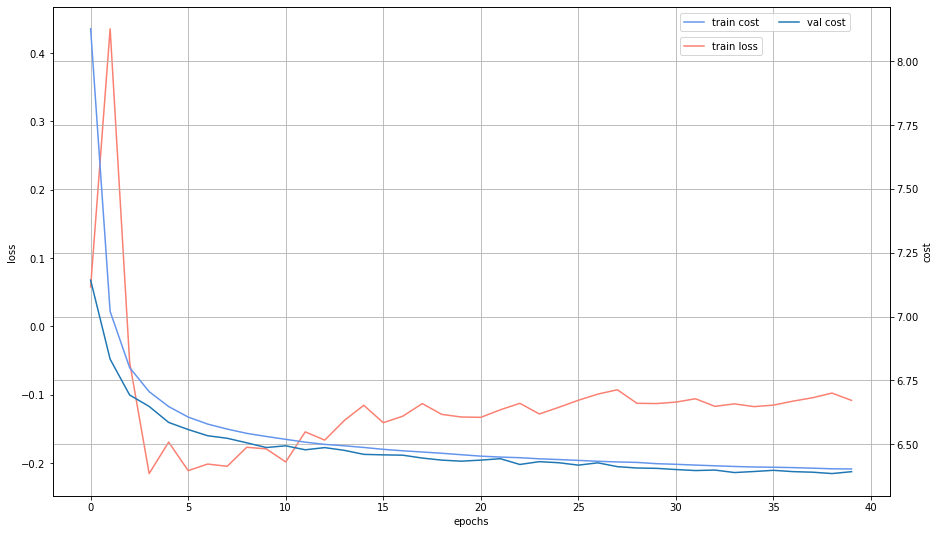

In [4]:
train_model(optimizer,
            model_pt,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )